In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [35]:
# objetivo: criar 
df = pd.read_csv("Iris_KNN.csv")
print(df.shape)
print(df.head())

(150, 6)
   sepal length  sepal width  petal length  petal width  class      class.1
0           5.1          3.5           1.4          0.2      0  Iris-setosa
1           4.9          3.0           1.4          0.2      0  Iris-setosa
2           4.7          3.2           1.3          0.2      0  Iris-setosa
3           4.6          3.1           1.5          0.2      0  Iris-setosa
4           5.0          3.6           1.4          0.2      0  Iris-setosa


In [36]:
#substituir valores class por um numero. Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2

#df['class.1'] = df['class.1'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

#df.head(100)


In [37]:
X = df.iloc[:, 0:4].values #4 primeiras colunas (variancia,skewness,curtosis,entropy)
y = df.iloc[:, 4].values # atributo calssificador (0 ou 1)

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 3)# grupo de 30% (0.3)

In [38]:
# Padronizar os dados
#escalonador = StandardScaler()
#X_treino = escalonador.fit_transform(X_treino)
#X_teste = escalonador.fit_transform(X_teste)

#X_teste

In [39]:
#Classificador KNN
k = 3
algoritmo = KNeighborsClassifier(n_neighbors = k)
algoritmo.fit(X_treino, y_treino)
previsoes = algoritmo.predict(X_teste)
previsoes

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0,
       2])

In [40]:
#Matriz de Confusão e validação da classificação

#                       classificação_real, classificação prevista
matriz_confusao = confusion_matrix(y_teste, previsoes)

acuracia = accuracy_score(y_teste, previsoes)

print(matriz_confusao)
print(acuracia)

[[17  0  0]
 [ 0 12  2]
 [ 0  0 14]]
0.9555555555555556


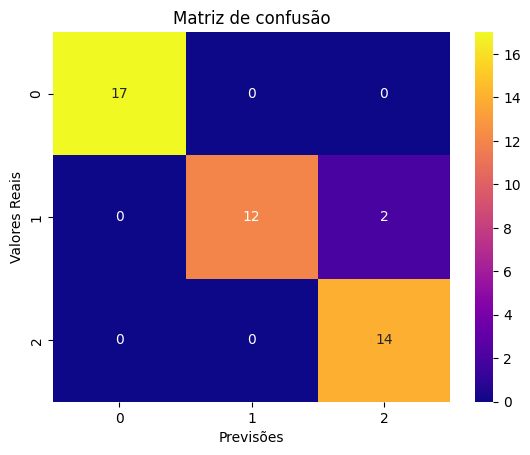

In [43]:
sns.heatmap(matriz_confusao, annot = True, fmt='d', cmap = 'plasma')
plt.xlabel("Previsões")
plt.ylabel("Valores Reais")

plt.title("Matriz de confusão")
plt.show()